# 바텀 라인의 영향력 분석

* end데이터와 15데이터가 겹치는 부분이 kda 밖에 없는 이유
    * 그 외에 터렛 파괴, 데미지, 경험치 등은 시간에 따라 당연히 상승하며, 게임 시간 길이에 따라 편차가 크므로 분석에 적합하지 않다고 판단.

# 1. 환경 준비

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings

# warnings.filterwarnings(action='ignore')
# %config InlineBackend.figure_format='retina'

In [2]:
# 데이터 불러오기
data = pd.read_excel('match_log_data.xlsx')
data.head(2)

,puuid,matchid,win,kills,deaths,assists,bountyGold,turretKills,turretsLost,totalDamageDone15,totalDamageDoneToChampions15,totalDamageTaken15,level15,xp15,minionsKilled15,totalGold15,kills15,deaths15,assists15
0,ZPFTEsnEwgz0EfXyXbdlj3HIzoKdjLJmkM4p8v4H9EYlEW...,KR_6611771034,True,19,2,5,0,5,3,70886,9620,5167,10,6813,150,8133,4,0,2
1,ZPFTEsnEwgz0EfXyXbdlj3HIzoKdjLJmkM4p8v4H9EYlEW...,KR_6611825559,False,7,4,8,450,2,10,50995,9032,4973,9,5170,126,6097,2,2,3


In [3]:
# 변수 제거
drop_cols = ['puuid', 'matchid']

data.drop(drop_cols, axis=1, inplace=True)

# 2. 데이터 이해

In [4]:
# 데이터 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   win                           250 non-null    bool 
 1   kills                         250 non-null    int64
 2   deaths                        250 non-null    int64
 3   assists                       250 non-null    int64
 4   bountyGold                    250 non-null    int64
 5   turretKills                   250 non-null    int64
 6   turretsLost                   250 non-null    int64
 7   totalDamageDone15             250 non-null    int64
 8   totalDamageDoneToChampions15  250 non-null    int64
 9   totalDamageTaken15            250 non-null    int64
 10  level15                       250 non-null    int64
 11  xp15                          250 non-null    int64
 12  minionsKilled15               250 non-null    int64
 13  totalGold15                   250 n

In [5]:
# 승패 비율 확인
data['win'].value_counts()

True     130
False    120
Name: win, dtype: int64

In [5]:
# DivisionByZero 방지를 위해 0 death는 1 death로 변경
data.loc[data['deaths'] == 0, 'deaths'] = 1
data.loc[data['deaths15'] == 0, 'deaths15'] = 1
data['KDA'] = (data['kills'] + data['assists']) / data['deaths']
data['KDA15'] = (data['kills15'] + data['assists15']) / data['deaths15']

In [6]:
col1 = data.columns[:4].to_list()
col2 = data.columns[4:17].to_list()

In [7]:
new_col = col1 + ['KDA'] + col2 + ['KDA15']
print(new_col)

['win', 'kills', 'deaths', 'assists', 'KDA', 'bountyGold', 'turretKills', 'turretsLost', 'totalDamageDone15', 'totalDamageDoneToChampions15', 'totalDamageTaken15', 'level15', 'xp15', 'minionsKilled15', 'totalGold15', 'kills15', 'deaths15', 'assists15', 'KDA15']


In [8]:
data = data[new_col]
data.head()

,win,kills,deaths,assists,KDA,bountyGold,turretKills,turretsLost,totalDamageDone15,totalDamageDoneToChampions15,totalDamageTaken15,level15,xp15,minionsKilled15,totalGold15,kills15,deaths15,assists15,KDA15
0,True,19,2,5,12.00,0,5,3,70886,9620,5167,10,6813,150,8133,4,1,2,6.000000
1,False,7,4,8,3.75,450,2,10,50995,9032,4973,9,5170,126,6097,2,2,3,2.500000
2,True,8,4,8,4.00,0,4,3,39510,5148,8499,8,4961,108,4679,1,3,1,0.666667
3,True,13,1,3,16.00,0,4,3,53311,4102,2082,9,5586,138,7735,3,1,1,4.000000
4,False,2,8,6,1.00,0,0,10,40709,5587,6992,9,5243,116,5821,0,4,5,1.250000


In [9]:
data.describe()

,kills,deaths,assists,KDA,bountyGold,turretKills,turretsLost,totalDamageDone15,totalDamageDoneToChampions15,totalDamageTaken15,level15,xp15,minionsKilled15,totalGold15,kills15,deaths15,assists15,KDA15
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000,250.00000,250.000000
mean,8.908000,6.124000,8.060000,3.938863,366.500000,1.928000,6.048000,47760.400000,6387.184000,6231.316000,8.588000,5207.852000,112.592000,6050.94800,2.680000,2.196000,2.28000,3.099333
std,5.160432,2.827828,3.918907,3.805995,458.339996,1.729387,3.506405,10703.479657,2341.453578,1653.102181,0.660303,602.778438,16.488573,1000.31459,1.926772,1.234374,1.59618,2.371239
min,0.000000,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000,23563.000000,782.000000,2082.000000,7.000000,3725.000000,55.000000,3733.00000,0.000000,1.000000,0.00000,0.000000
25%,5.000000,4.000000,5.000000,1.750000,0.000000,0.000000,3.000000,40240.750000,4631.500000,5168.500000,8.000000,4768.250000,101.000000,5380.50000,1.000000,1.000000,1.00000,1.250000
50%,8.000000,6.000000,7.000000,2.875000,150.000000,2.000000,7.000000,47461.500000,6197.500000,6164.500000,9.000000,5159.000000,114.000000,5954.50000,2.000000,2.000000,2.00000,2.500000
75%,11.000000,8.000000,10.000000,4.312500,637.500000,3.000000,9.000000,54738.500000,7816.000000,7127.750000,9.000000,5632.250000,124.000000,6713.75000,4.000000,3.000000,3.00000,4.375000
max,33.000000,15.000000,19.000000,25.000000,2225.000000,8.000000,11.000000,78631.000000,15387.000000,11805.000000,10.000000,6914.000000,150.000000,9705.00000,8.000000,5.000000,8.00000,12.000000


### 0. 데이터 분할

In [10]:
col_end = list(data)[:8]
col_15 = list(data)[8:]
print(col_end)
print(col_15)

['win', 'kills', 'deaths', 'assists', 'KDA', 'bountyGold', 'turretKills', 'turretsLost']
['totalDamageDone15', 'totalDamageDoneToChampions15', 'totalDamageTaken15', 'level15', 'xp15', 'minionsKilled15', 'totalGold15', 'kills15', 'deaths15', 'assists15', 'KDA15']


In [19]:
data_win = data[data['win'] == True]
data_lose = data[data['win'] == False]

data_end = data.loc[:, col_end]
data_15 = data.loc[:, ['win'] + col_15]

In [21]:
data_win.to_excel('data_win.xlsx', index=False)
data_lose.to_excel('data_lose.xlsx', index=False)

data_end.to_excel('data_end.xlsx', index=False)
data_15.to_excel('data_15.xlsx', index=False)

In [11]:
data_win = pd.read_excel('data_win.xlsx')
data_lose = pd.read_excel('data_lose.xlsx')

data_end = pd.read_excel('data_end.xlsx')
data_15 = pd.read_excel('data_15.xlsx')

In [12]:
col_end = list(data_end)
col_15 = list(data_15)
print(col_end)
print(col_15)

['win', 'kills', 'deaths', 'assists', 'KDA', 'bountyGold', 'turretKills', 'turretsLost']
['win', 'totalDamageDone15', 'totalDamageDoneToChampions15', 'totalDamageTaken15', 'level15', 'xp15', 'minionsKilled15', 'totalGold15', 'kills15', 'deaths15', 'assists15', 'KDA15']


### 1. 승리 데이터 분석

In [28]:
# 승리 데이터 요약
data_win.describe()

,kills,deaths,assists,KDA,bountyGold,turretKills,turretsLost,totalDamageDone15,totalDamageDoneToChampions15,totalDamageTaken15,level15,xp15,minionsKilled15,totalGold15,kills15,deaths15,assists15,KDA15
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,10.023077,5.169231,9.492308,5.538642,251.730769,2.823077,3.176923,48005.169231,6409.669231,6205.176923,8.607692,5243.546154,113.384615,6122.076923,2.830769,2.138462,2.430769,3.415256
std,5.120964,2.806798,3.922201,4.603851,403.355457,1.718415,2.028729,10792.181844,2382.730205,1728.000446,0.652914,599.546342,16.511394,1029.695820,2.015977,1.231082,1.688715,2.612454
min,1.000000,1.000000,1.000000,0.600000,0.000000,0.000000,0.000000,23563.000000,1444.000000,2082.000000,7.000000,3725.000000,68.000000,3733.000000,0.000000,1.000000,0.000000,0.000000
25%,6.000000,3.000000,7.000000,2.781250,0.000000,2.000000,2.000000,40363.000000,4574.750000,5074.750000,8.000000,4858.000000,102.000000,5444.500000,1.000000,1.000000,1.000000,1.270833
50%,9.500000,5.000000,9.000000,4.000000,0.000000,3.000000,3.000000,48543.000000,6199.000000,6013.500000,9.000000,5182.500000,115.000000,6003.000000,3.000000,2.000000,2.000000,3.000000
75%,13.000000,7.000000,11.750000,6.712500,450.000000,4.000000,4.000000,55552.750000,7825.000000,7138.250000,9.000000,5667.500000,124.750000,6807.000000,4.000000,3.000000,3.000000,5.375000
max,25.000000,15.000000,19.000000,25.000000,2225.000000,8.000000,8.000000,70886.000000,15387.000000,11805.000000,10.000000,6818.000000,150.000000,9705.000000,8.000000,5.000000,8.000000,12.000000


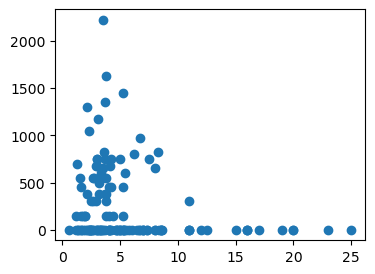

In [31]:
plt.figure(figsize=(4,3))
plt.scatter(data_win['KDA'], data_win['bountyGold'])
plt.show()

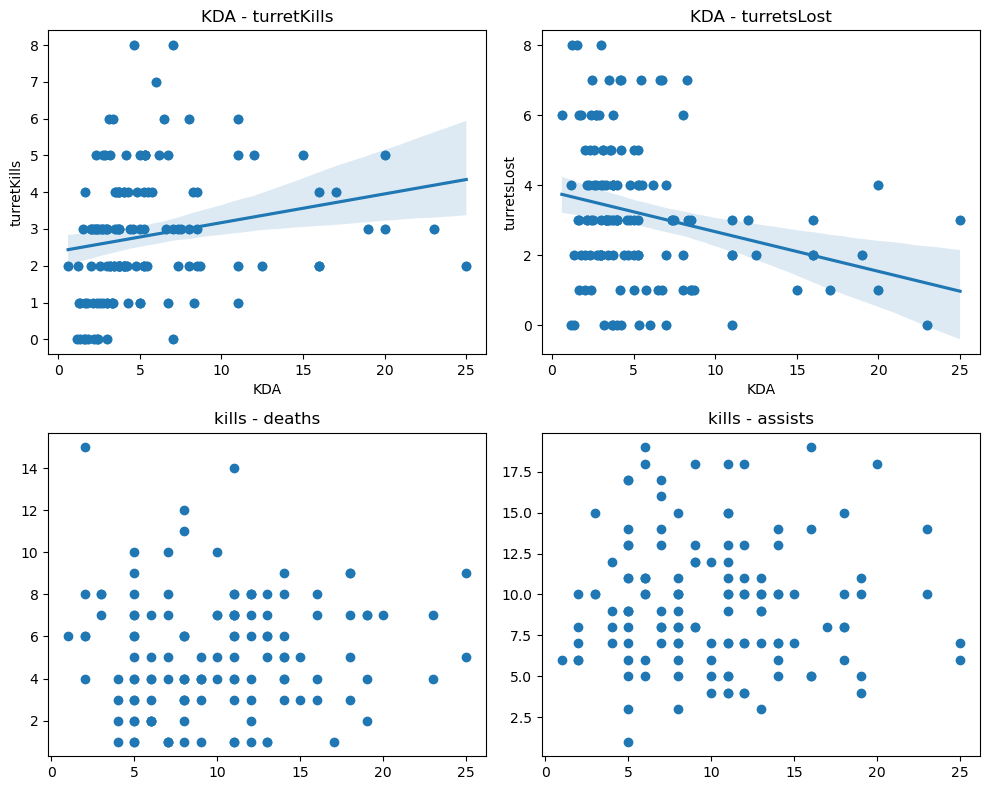

In [37]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.scatter(data_win['KDA'], data_win['turretKills'])
sns.regplot(x='KDA', y='turretKills', data=data_win)
plt.gca().set_title('KDA - turretKills')

plt.subplot(2,2,2)
plt.scatter(data_win['KDA'], data_win['turretsLost'])
sns.regplot(x='KDA', y='turretsLost', data=data_win)
plt.gca().set_title('KDA - turretsLost')

plt.subplot(2,2,3)
plt.scatter(data_win['kills'], data_win['deaths'])
plt.gca().set_title('kills - deaths')

plt.subplot(2,2,4)
plt.scatter(data_win['kills'], data_win['assists'])
plt.gca().set_title('kills - assists')

plt.tight_layout()
plt.show()

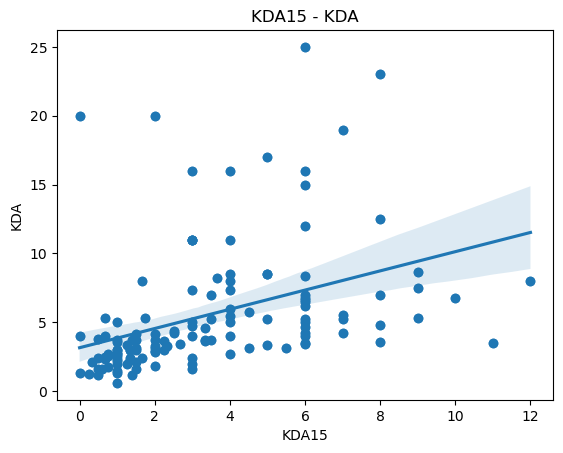

In [39]:
plt.scatter(data_win['KDA15'], data_win['KDA'])
sns.regplot(x='KDA15', y='KDA', data=data_win)
plt.title('KDA15 - KDA')
plt.show()

In [40]:
data_win['KDA_change'] = data_win['KDA'] / data_win['KDA15']

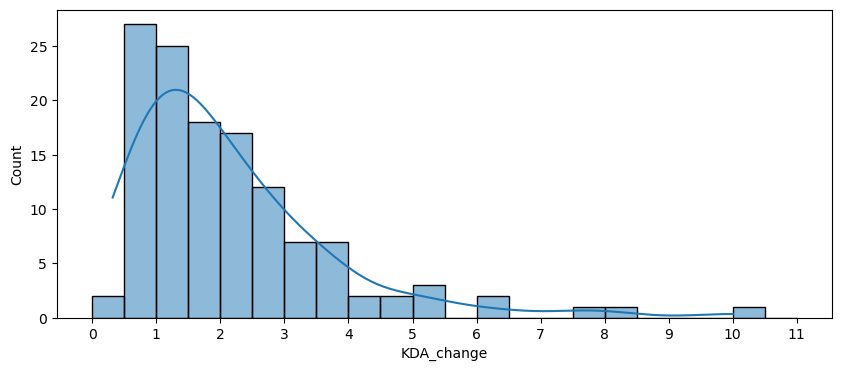

In [60]:
plt.figure(figsize=(10,4))
plt.xticks(ticks=np.arange(0, 12, 1))
sns.histplot(data_win['KDA_change'], binwidth=0.5, binrange=(0, 11), kde=True)
plt.show()

In [48]:
data_win[data_win['KDA_change'] == np.inf]

,win,kills,deaths,assists,KDA,bountyGold,turretKills,turretsLost,totalDamageDone15,totalDamageDoneToChampions15,totalDamageTaken15,level15,xp15,minionsKilled15,totalGold15,kills15,deaths15,assists15,KDA15,KDA_change
9,True,4,3,8,4.000000,0,2,0,43747,3618,3556,9,5822,124,4888,0,1,0,0.0,inf
29,True,2,6,6,1.333333,0,1,2,50393,4212,4519,9,5344,126,4950,0,3,0,0.0,inf
36,True,13,1,7,20.000000,0,5,1,41332,2662,3302,8,5020,125,4807,0,1,0,0.0,inf


In [44]:
data_win[['KDA_change']].describe().T

,count,mean,std,min,25%,50%,75%,max
KDA_change,130.0,inf,NaN,0.318182,1.066752,1.68375,2.747024,inf


In [26]:
win_end = data_win.loc[:, col_end]
win_end.describe()

,kills,deaths,assists,KDA,bountyGold,turretKills,turretsLost
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,10.023077,5.169231,9.492308,5.538642,251.730769,2.823077,3.176923
std,5.120964,2.806798,3.922201,4.603851,403.355457,1.718415,2.028729
min,1.000000,1.000000,1.000000,0.600000,0.000000,0.000000,0.000000
25%,6.000000,3.000000,7.000000,2.781250,0.000000,2.000000,2.000000
50%,9.500000,5.000000,9.000000,4.000000,0.000000,3.000000,3.000000
75%,13.000000,7.000000,11.750000,6.712500,450.000000,4.000000,4.000000
max,25.000000,15.000000,19.000000,25.000000,2225.000000,8.000000,8.000000


In [17]:
win_15 = data_win.loc[:, col_15]
win_15.describe()

,totalDamageDone15,totalDamageDoneToChampions15,totalDamageTaken15,level15,xp15,minionsKilled15,totalGold15,kills15,deaths15,assists15,KDA15
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,48005.169231,6409.669231,6205.176923,8.607692,5243.546154,113.384615,6122.076923,2.830769,2.138462,2.430769,3.415256
std,10792.181844,2382.730205,1728.000446,0.652914,599.546342,16.511394,1029.695820,2.015977,1.231082,1.688715,2.612454
min,23563.000000,1444.000000,2082.000000,7.000000,3725.000000,68.000000,3733.000000,0.000000,1.000000,0.000000,0.000000
25%,40363.000000,4574.750000,5074.750000,8.000000,4858.000000,102.000000,5444.500000,1.000000,1.000000,1.000000,1.270833
50%,48543.000000,6199.000000,6013.500000,9.000000,5182.500000,115.000000,6003.000000,3.000000,2.000000,2.000000,3.000000
75%,55552.750000,7825.000000,7138.250000,9.000000,5667.500000,124.750000,6807.000000,4.000000,3.000000,3.000000,5.375000
max,70886.000000,15387.000000,11805.000000,10.000000,6818.000000,150.000000,9705.000000,8.000000,5.000000,8.000000,12.000000


### 2. 패배 데이터 분석

In [36]:
# 패배 데이터 요약
data_lose = data[data['win'] == False]
data_lose.describe()

,kills,deaths,assists,bountyGold,turretKills,turretsLost,totalDamageDone15,totalDamageDoneToChampions15,totalDamageTaken15,level15,xp15,minionsKilled15,totalGold15,kills15,deaths15,assists15
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.00000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,7.700000,7.158333,6.508333,490.833333,0.958333,9.158333,47495.233333,6362.82500,6259.633333,8.566667,5169.183333,111.733333,5973.891667,2.516667,2.141667,2.116667
std,4.946096,2.473374,3.284790,482.932800,1.110650,1.582445,10645.370312,2305.63224,1574.686246,0.670298,606.389355,16.489739,965.850422,1.819518,1.392029,1.479174
min,0.000000,2.000000,0.000000,0.000000,0.000000,4.000000,24036.000000,782.00000,2627.000000,7.000000,3882.000000,55.000000,3902.000000,0.000000,0.000000,0.000000
25%,4.750000,5.000000,4.000000,0.000000,0.000000,8.000000,40254.750000,4871.50000,5304.250000,8.000000,4710.750000,101.000000,5337.000000,1.000000,1.000000,1.000000
50%,7.000000,7.000000,6.000000,375.000000,1.000000,9.000000,47009.000000,6197.50000,6215.500000,9.000000,5141.500000,113.500000,5909.000000,2.000000,2.000000,2.000000
75%,9.250000,9.000000,8.000000,800.000000,2.000000,10.000000,54218.750000,7802.00000,7108.500000,9.000000,5616.500000,123.250000,6508.500000,3.000000,3.000000,3.000000
max,33.000000,13.000000,17.000000,2050.000000,4.000000,11.000000,78631.000000,13179.00000,10459.000000,10.000000,6914.000000,148.000000,8935.000000,8.000000,5.000000,6.000000


### 3. 전체kda vs 15분kda

In [38]:
kda_toal = data.loc[:, ['kills', 'deaths', 'assists']]
kda_15 = data.loc[:, ['kills15', 'deaths15', 'assists15']]

display(kda_toal.describe())
display(kda_15.describe())

,kills,deaths,assists
count,250.000000,250.000000,250.000000
mean,8.908000,6.108000,8.060000
std,5.160432,2.859553,3.918907
min,0.000000,0.000000,0.000000
25%,5.000000,4.000000,5.000000
50%,8.000000,6.000000,7.000000
75%,11.000000,8.000000,10.000000
max,33.000000,15.000000,19.000000


,kills15,deaths15,assists15
count,250.000000,250.000000,250.00000
mean,2.680000,2.052000,2.28000
std,1.926772,1.411832,1.59618
min,0.000000,0.000000,0.00000
25%,1.000000,1.000000,1.00000
50%,2.000000,2.000000,2.00000
75%,4.000000,3.000000,3.00000
max,8.000000,5.000000,8.00000


In [14]:
data2 = data.copy()
data2[data2['KDA15'] == 0.0] = 1.0
data2['KDA_change'] = data2['KDA'] / data2['KDA15']
data2.head()

,win,kills,deaths,assists,KDA,bountyGold,turretKills,turretsLost,totalDamageDone15,totalDamageDoneToChampions15,totalDamageTaken15,level15,xp15,minionsKilled15,totalGold15,kills15,deaths15,assists15,KDA15,KDA_change
0,True,19,2,5,12.00,0,5,3,70886,9620,5167,10,6813,150,8133,4,1,2,6.000000,2.0
1,False,7,4,8,3.75,450,2,10,50995,9032,4973,9,5170,126,6097,2,2,3,2.500000,1.5
2,True,8,4,8,4.00,0,4,3,39510,5148,8499,8,4961,108,4679,1,3,1,0.666667,6.0
3,True,13,1,3,16.00,0,4,3,53311,4102,2082,9,5586,138,7735,3,1,1,4.000000,4.0
4,False,2,8,6,1.00,0,0,10,40709,5587,6992,9,5243,116,5821,0,4,5,1.250000,0.8


In [28]:
data2[data2['KDA_change'] == np.inf]

,win,kills,deaths,assists,KDA,bountyGold,turretKills,turretsLost,totalDamageDone15,totalDamageDoneToChampions15,totalDamageTaken15,level15,xp15,minionsKilled15,totalGold15,kills15,deaths15,assists15,KDA15,KDA_change


In [29]:
data2.to_excel('match_log_data_with_change.xlsx', index=False)

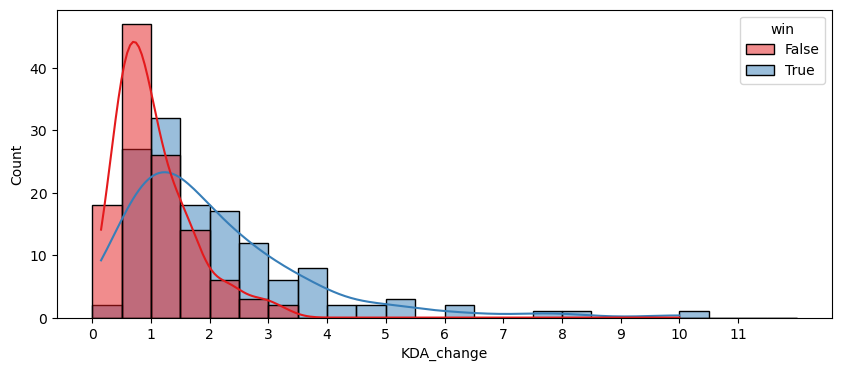

In [15]:
plt.figure(figsize=(10,4))
plt.xticks(ticks=np.arange(0, 12, 1))
sns.histplot(data=data2, x='KDA_change', hue='win',
             palette='Set1',
             binwidth=0.5, binrange=(0, 12), kde=True)
plt.show()

* KDA 변화량이 1 이상인 횟수는 승리시가 패배시보다 많다.

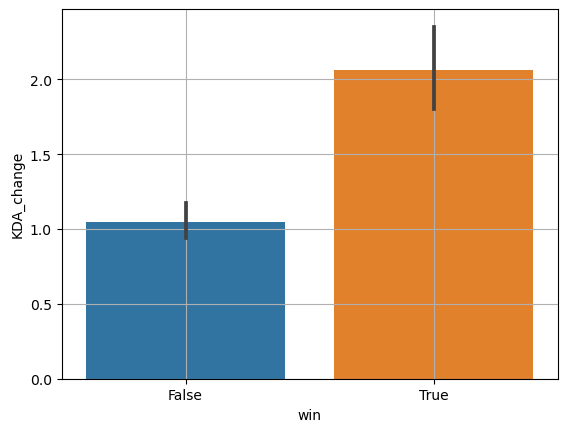

In [20]:
sns.barplot(x='win', y='KDA_change', data=data2)
plt.grid()
plt.show()

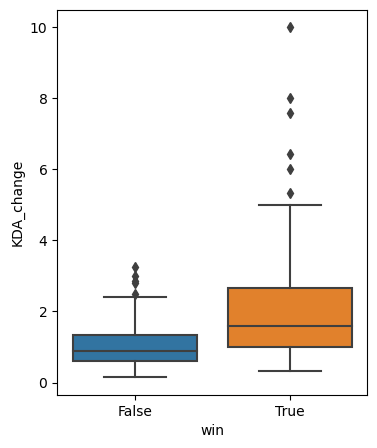

In [25]:
plt.figure(figsize=(4,5))
sns.boxplot(x='win', y='KDA_change', orient='v', data=data2)
plt.show()

In [32]:
data2_win = data2.loc[data2['win'] == True, 'KDA_change']
data2_lose = data2.loc[data2['win'] == False, 'KDA_change']

In [33]:
import scipy.stats as spst

spst.ttest_ind(data2_win, data2_lose)

Ttest_indResult(statistic=6.490681325265315, pvalue=4.6164722905900184e-10)

### 특정 column과 승패 여부의 관계

In [38]:
def t_test(col):
    xt = data2.loc[data2['win'] == True, col]
    yt = data2.loc[data2['win'] == False, col]
    ttest = spst.ttest_ind(xt, yt)
    print("win/lose ttest -", col, " :", ttest)
    return ttest

In [41]:
df_tt = pd.DataFrame(columns=['attribute', 'statistic', 'pvalue'])
for col in list(data2)[1:]:
    ttest = t_test(col)
    ttest_dict = {'attribute': col, 'statistic': ttest[0], 'pvalue': ttest[1]}
    df_tt = df_tt.append(ttest_dict, ignore_index=True)

df_tt = df_tt.sort_values('statistic', ascending=False)
display(df_tt)

win/lose ttest - kills  : Ttest_indResult(statistic=2.748225559134108, pvalue=0.006432127481214356)
win/lose ttest - deaths  : Ttest_indResult(statistic=-6.30489653093795, pvalue=1.3111585633631462e-09)
win/lose ttest - assists  : Ttest_indResult(statistic=5.119347906050577, pvalue=6.153260221432956e-07)
win/lose ttest - KDA  : Ttest_indResult(statistic=7.005886761988297, pvalue=2.3021662051081164e-11)
win/lose ttest - bountyGold  : Ttest_indResult(statistic=-4.552562799973446, pvalue=8.309180248347396e-06)
win/lose ttest - turretKills  : Ttest_indResult(statistic=9.507523964081555, pvalue=1.778415698274716e-18)
win/lose ttest - turretsLost  : Ttest_indResult(statistic=-25.93705085127427, pvalue=1.3531704930158304e-72)
win/lose ttest - totalDamageDone15  : Ttest_indResult(statistic=-1.2733679227174526, pvalue=0.20407975455254973)
win/lose ttest - totalDamageDoneToChampions15  : Ttest_indResult(statistic=-1.1495736053650314, pvalue=0.25142693370027175)
win/lose ttest - totalDamageTaken1

,attribute,statistic,pvalue
5,turretKills,9.507524,1.778416e-18
3,KDA,7.005887,2.302166e-11
18,KDA_change,6.490681,4.616472e-10
2,assists,5.119348,6.153260e-07
0,kills,2.748226,6.432127e-03
17,KDA15,1.736949,8.363781e-02
16,assists15,1.113512,2.665668e-01
14,kills15,0.811311,4.179652e-01
15,deaths15,-0.922439,3.571959e-01
13,totalGold15,-1.052757,2.934770e-01


In [44]:
# |t|값이 2보다 큰 -승패별 attirbute 평균에 차이가 있는- attribute 들
df_tt2 = df_tt[abs(df_tt['statistic']) > 2].sort_values('statistic', ascending=False)
df_tt2

,attribute,statistic,pvalue
5,turretKills,9.507524,1.778416e-18
3,KDA,7.005887,2.302166e-11
18,KDA_change,6.490681,4.616472e-10
2,assists,5.119348,6.153260e-07
0,kills,2.748226,6.432127e-03
10,level15,-2.173278,3.070613e-02
4,bountyGold,-4.552563,8.309180e-06
1,deaths,-6.304897,1.311159e-09
6,turretsLost,-25.937051,1.353170e-72


# 3. 데이터 준비

In [8]:
# 승패 True False -> 1, 0
# data = data.replace({'win': {True:1}}, {'win': {False:0}})
data = data.replace(True, 1)
data = data.replace(False, 0)

display(data['win'].value_counts())
display(data.head())

1    130
0    120
Name: win, dtype: int64

,puuid,matchid,win,kills,deaths,assists,bountyGold,turretKills,turretsLost,totalDamageDone15,totalDamageDoneToChampions15,totalDamageTaken15,level15,xp15,minionsKilled15,totalGold15,kills15,deaths15,assists15
0,ZPFTEsnEwgz0EfXyXbdlj3HIzoKdjLJmkM4p8v4H9EYlEW...,KR_6611771034,1,19,2,5,0,5,3,70886,9620,5167,10,6813,150,8133,4,0,2
1,ZPFTEsnEwgz0EfXyXbdlj3HIzoKdjLJmkM4p8v4H9EYlEW...,KR_6611825559,0,7,4,8,450,2,10,50995,9032,4973,9,5170,126,6097,2,2,3
2,ZPFTEsnEwgz0EfXyXbdlj3HIzoKdjLJmkM4p8v4H9EYlEW...,KR_6611894390,1,8,4,8,0,4,3,39510,5148,8499,8,4961,108,4679,1,3,1
3,ZPFTEsnEwgz0EfXyXbdlj3HIzoKdjLJmkM4p8v4H9EYlEW...,KR_6613941315,1,13,1,3,0,4,3,53311,4102,2082,9,5586,138,7735,3,1,1
4,ZPFTEsnEwgz0EfXyXbdlj3HIzoKdjLJmkM4p8v4H9EYlEW...,KR_6613987729,0,2,8,6,0,0,10,40709,5587,6992,9,5243,116,5821,0,4,5


In [9]:
# # 변수 제거
# drop_cols = ['puuid', 'matchid']

# data.drop(drop_cols, axis=1, inplace=True)

In [10]:
# x, y 분리
target = 'win'

x = data.drop(target, axis=1)
y = data.loc[:, target]

In [12]:
# 가변수화
dumm_cols = ['level15']

x = pd.get_dummies(x, columns=dumm_cols, drop_first=True)
x.head()

,kills,deaths,assists,bountyGold,turretKills,turretsLost,totalDamageDone15,totalDamageDoneToChampions15,totalDamageTaken15,xp15,minionsKilled15,totalGold15,kills15,deaths15,assists15,level15_8,level15_9,level15_10
0,19,2,5,0,5,3,70886,9620,5167,6813,150,8133,4,0,2,0,0,1
1,7,4,8,450,2,10,50995,9032,4973,5170,126,6097,2,2,3,0,1,0
2,8,4,8,0,4,3,39510,5148,8499,4961,108,4679,1,3,1,1,0,0
3,13,1,3,0,4,3,53311,4102,2082,5586,138,7735,3,1,1,0,1,0
4,2,8,6,0,0,10,40709,5587,6992,5243,116,5821,0,4,5,0,1,0


In [13]:
# train, val, test 분리
from sklearn.model_selection import train_test_split

# train:test = 8:2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# # train:val:test = 7:2:1
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
# x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.33, random_state=1)


In [14]:
# 정규화
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# 4. 모델링

In [17]:
# 1) 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
# 2) 선언하기
model = DecisionTreeClassifier(max_depth=5, random_state=1)

In [22]:
# 3) 학습하기
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [23]:
# 4) 예측하기
y_pred = model.predict(x_test)

In [24]:
# 5) 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[23  0]
 [ 3 24]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        23
           1       1.00      0.89      0.94        27

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



# 5. 시각화 및 변수 중요도

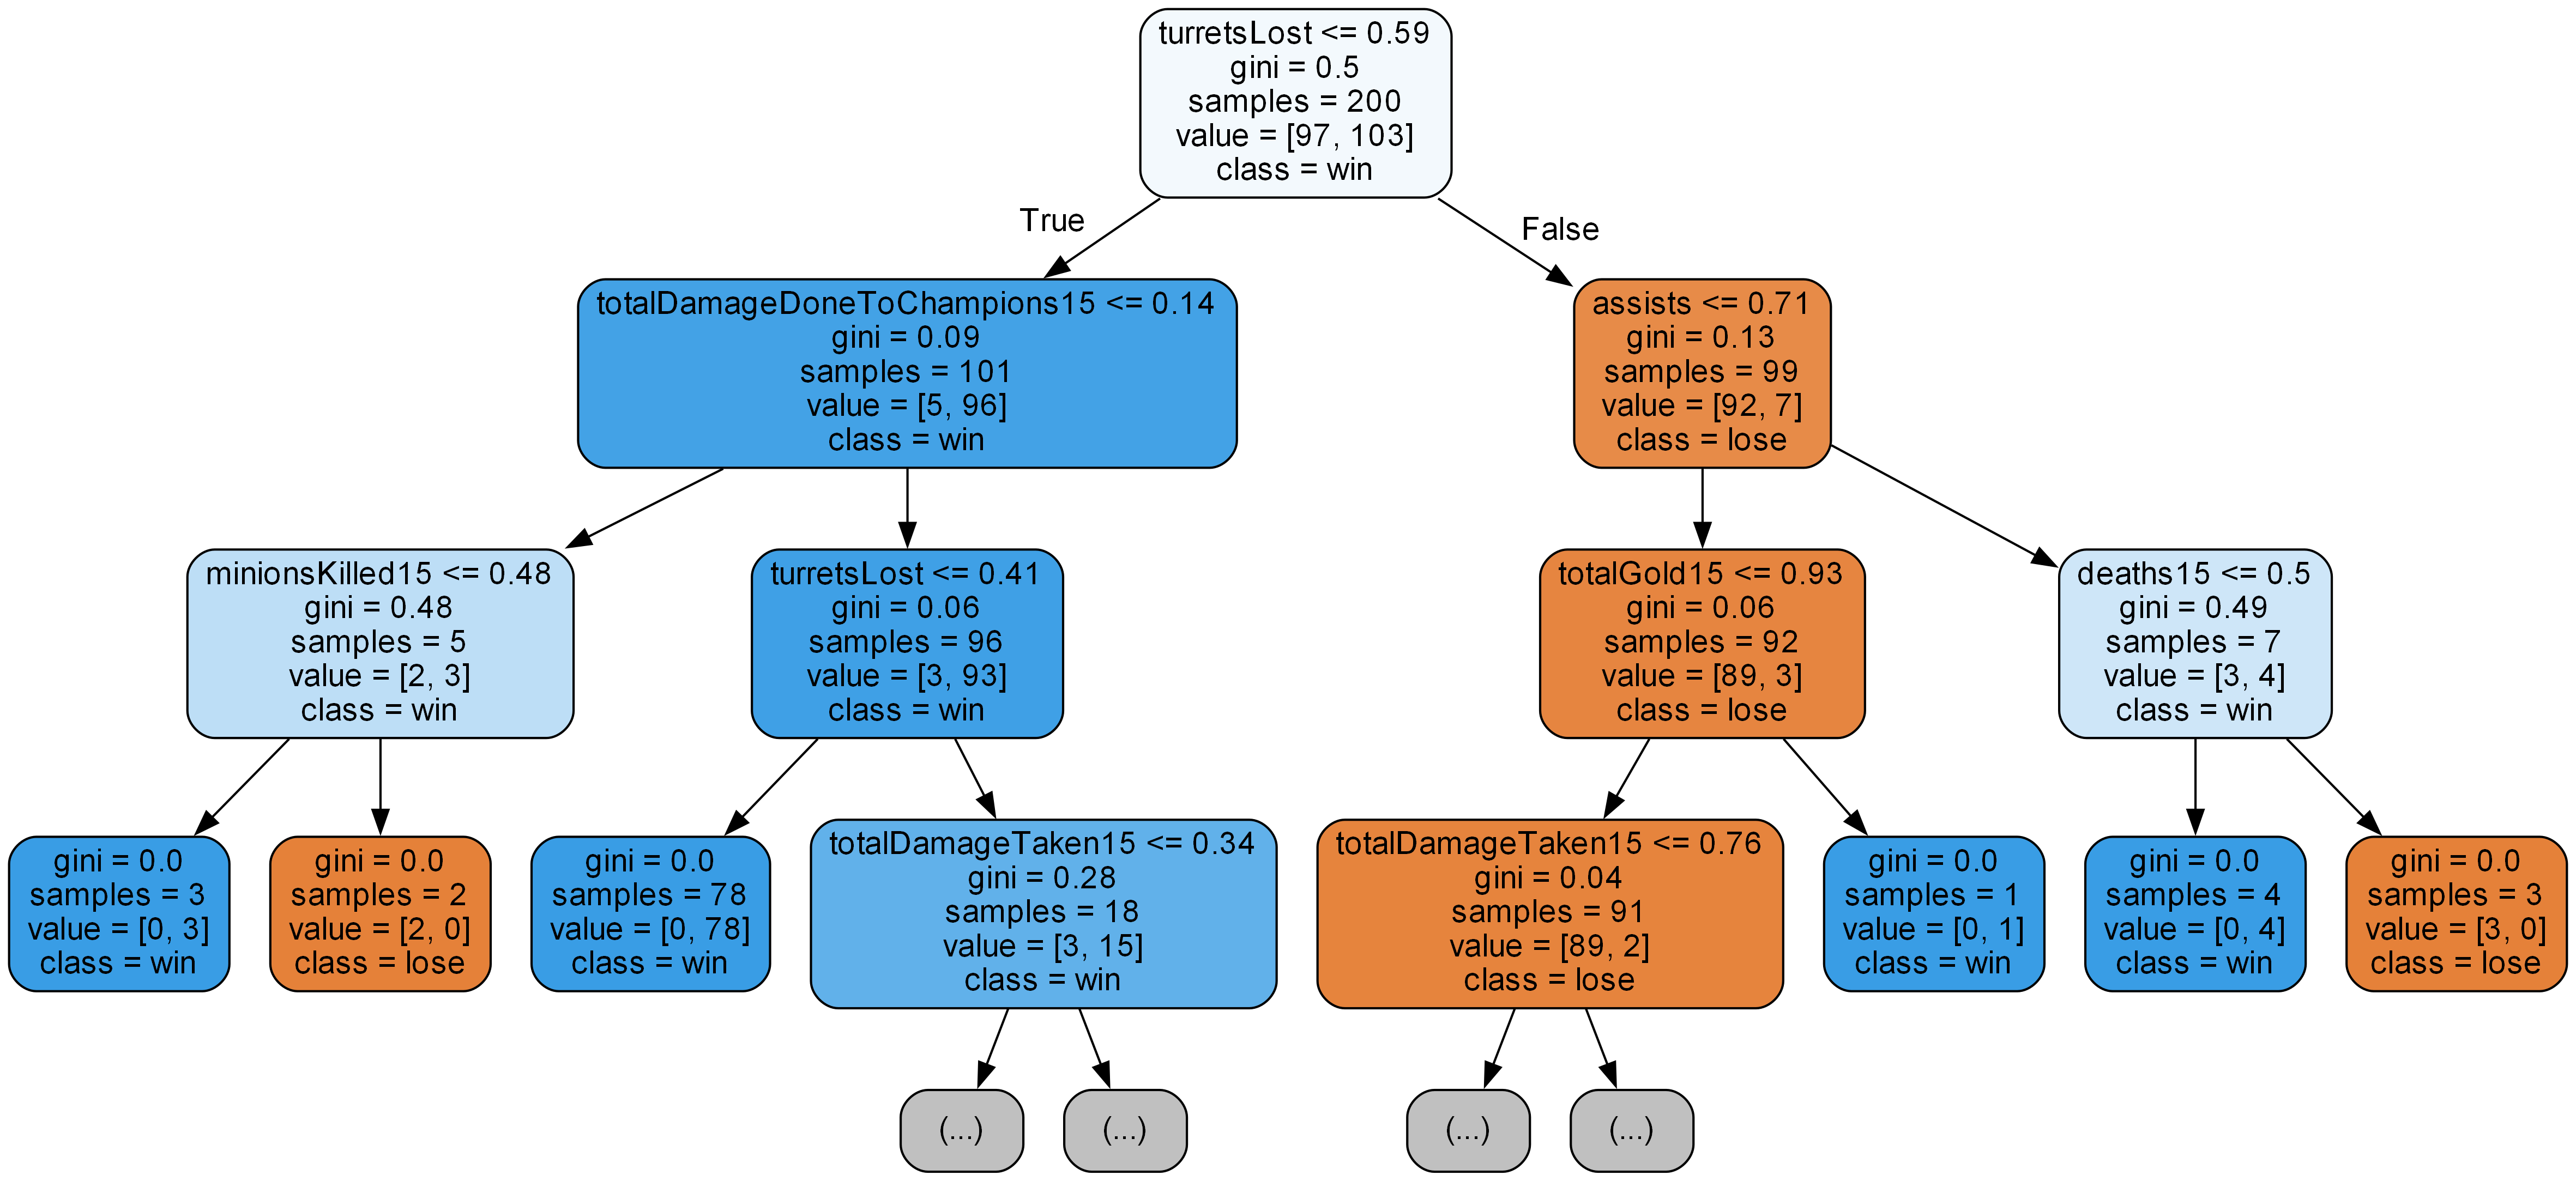

In [25]:
# 시각화 모듈 불러오기
from sklearn.tree import export_graphviz
from IPython.display import Image

# 이미지 파일 만들기
export_graphviz(model,                                 # 모델 이름
                out_file='tree.dot',                   # 파일 이름 
                feature_names=x.columns,               # Feature 이름
                class_names=['lose', 'win'],           # Target Class 이름
                rounded=True,                          # 둥근 테두리
                precision=2,                           # 불순도 소숫점 자리수
                max_depth=3,                           # 출력할 트리 깊이
                filled=True)                           # 박스 내부 채우기

# 파일 변환
!dot tree.dot -Tpng -otree.png -Gdpi=300

# 이미지 파일 표시
Image(filename='tree.png')

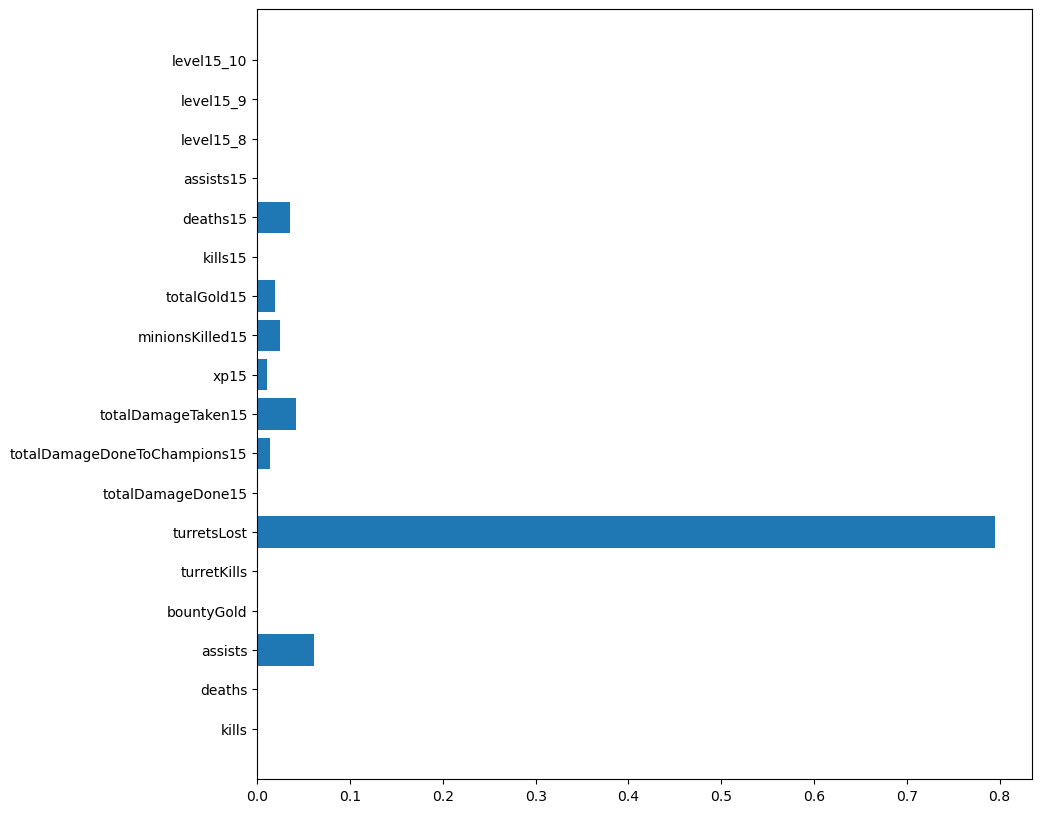

In [26]:
# 변수 중요도
plt.figure(figsize=(10, 10))
plt.barh(list(x), model.feature_importances_)
plt.show()

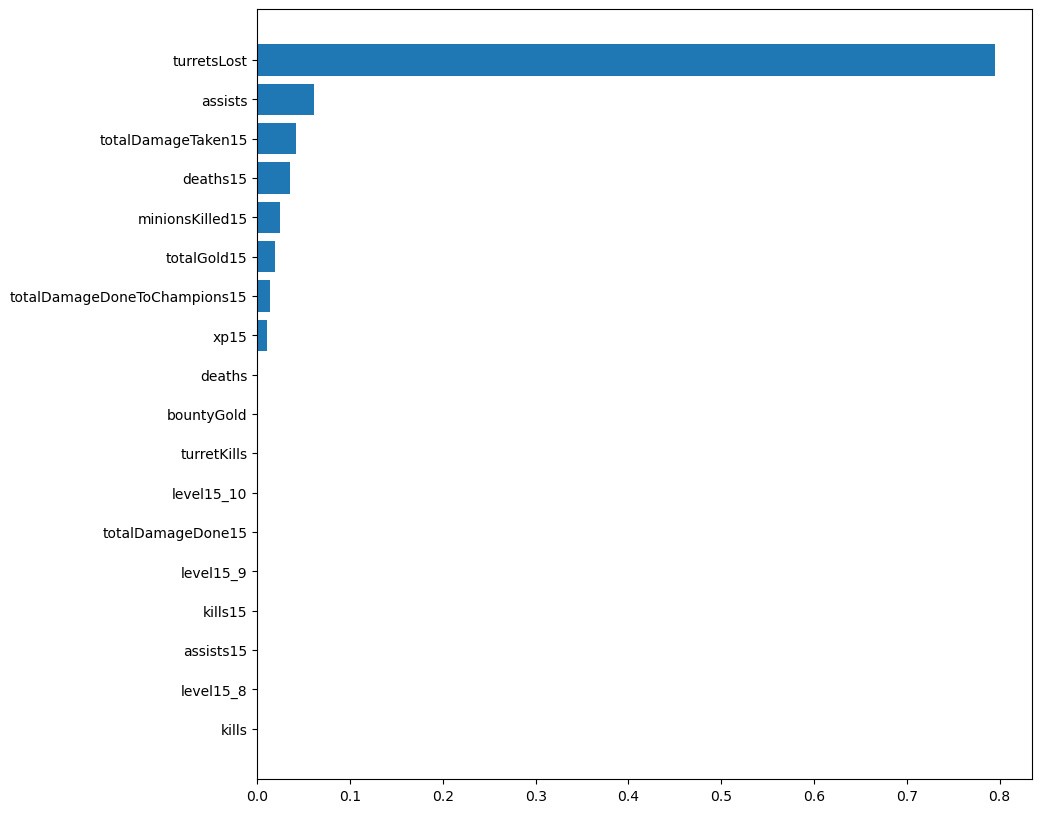

In [27]:
# 변수 중요도 정렬
perf_dic = {'feature':list(x), 'importance': model.feature_importances_}
df = pd.DataFrame(perf_dic)
df.sort_values(by='importance', ascending=True, inplace=True)

# 시각화
plt.figure(figsize=(10, 10))
plt.barh(df['feature'], df['importance'])
plt.show()

# 6. 인사이트

* ~ 데이터가 중요함
* 실제로는 영향력이 ~